# **Random Forest Classifier**

In [1]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("/content/titanic.csv")   # adjust path if needed

# Preprocessing
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Features & Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-1117499236.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-1117499236.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [2]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [3]:
# Model Accuracy
accuracy = clf.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8156424581005587


In [4]:
# Predictions
y_pred = clf.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[95 10]
 [23 51]]


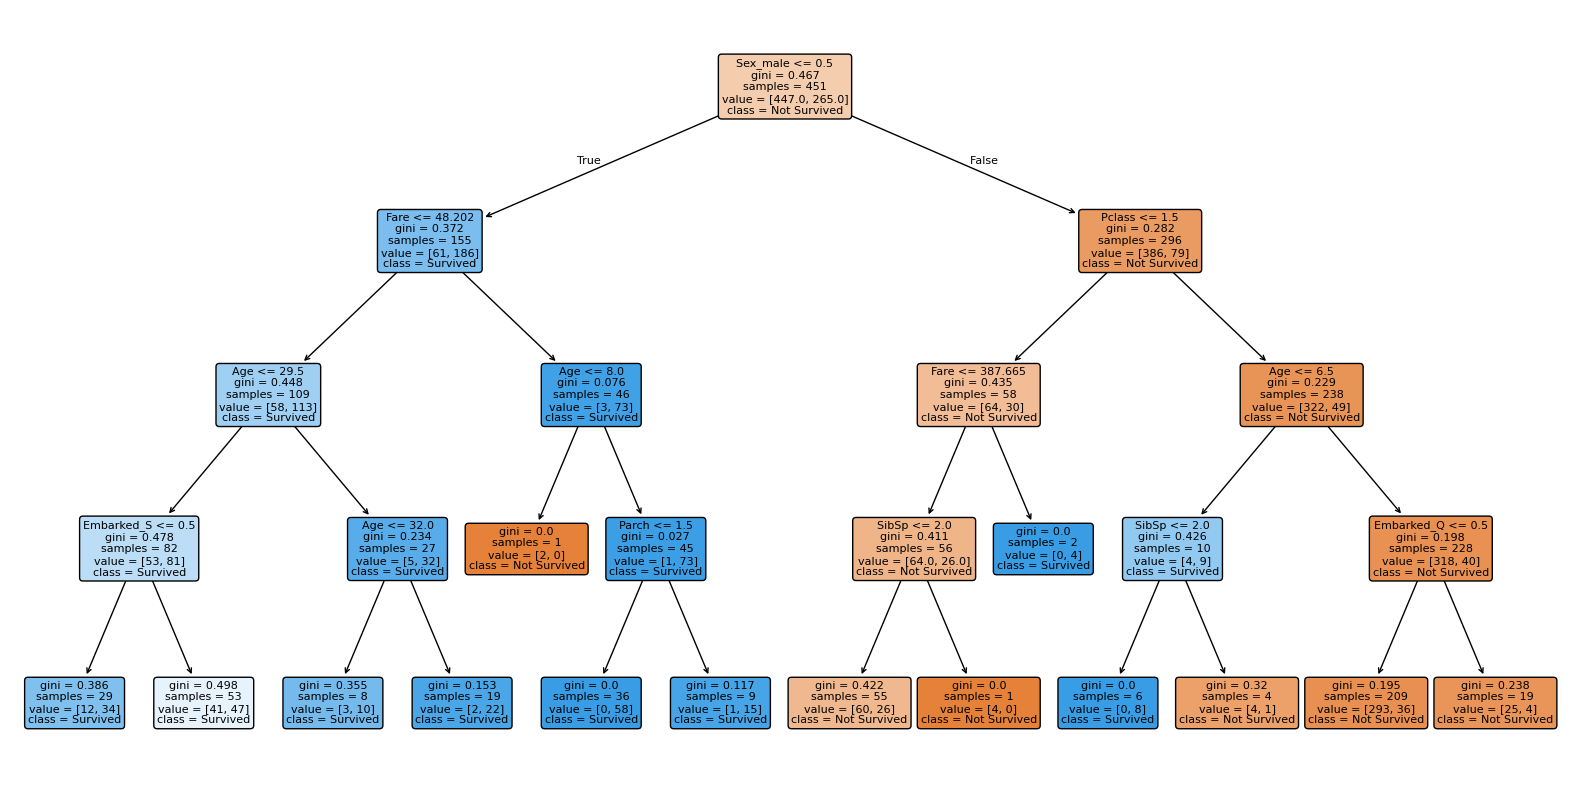

In [6]:
# Visualize ONE tree from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(
    clf.estimators_[0],   # take the first tree
    filled=True,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    rounded=True,
    fontsize=8
)
plt.show()

In [7]:
from sklearn.metrics import classification_report

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

